# Looking at channel profiles in the Killmade Burn

This notebook looks at some data from the Killmade Burn, a tributary to the Whiteadder Water, a small catchment in the Scottish Borders.

## Load the data

We are going to load the data using `geopandas`. 
`pandas` is a python packages for dealing with various datasets, and it is very good at handling csv data. `geopandas` builds on `pandas` so that spatial information is recognised by package. Before we do anything with the data we need to `import` these two python packages. 

In [1]:
import pandas as pd
import geopandas as gpd

Data that goes into `pandas` is called a *dataframe*. The dataframe holds the data but also the data column names.
To get a `geopandas` dataframe we first load a csv file into a `pandas` dataframe. I'll use the `head` command to show you what the first few rows of data look like:

In [2]:
df = pd.read_csv("el_study_chi_data_map.csv")
df.head()

,latitude,longitude,chi,elevation,flow_distance,drainage_area,source_key,basin_key
0,55.877436,-2.549256,9.1343,389.98,4230.0,46852.0,0,0
1,55.877454,-2.549224,9.1119,389.98,4227.2,46864.0,0,0
2,55.877472,-2.549224,9.0961,389.95,4225.2,46912.0,0,0
3,55.877490,-2.549224,9.0803,389.95,4223.2,48104.0,0,0
4,55.877507,-2.549192,9.0581,389.91,4220.3,48160.0,0,0


Now we read this into a `geopandas` dataframe:

In [4]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
print(gdf.head())

    latitude  longitude     chi  elevation  flow_distance  drainage_area  \
0  55.877436  -2.549256  9.1343     389.98         4230.0        46852.0   
1  55.877454  -2.549224  9.1119     389.98         4227.2        46864.0   
2  55.877472  -2.549224  9.0961     389.95         4225.2        46912.0   
3  55.877490  -2.549224  9.0803     389.95         4223.2        48104.0   
4  55.877507  -2.549192  9.0581     389.91         4220.3        48160.0   

   source_key  basin_key                   geometry  
0           0          0  POINT (-2.54926 55.87744)  
1           0          0  POINT (-2.54922 55.87745)  
2           0          0  POINT (-2.54922 55.87747)  
3           0          0  POINT (-2.54922 55.87749)  
4           0          0  POINT (-2.54919 55.87751)  


It is really easy to get data out of `pandas` and `geopandas` dataframes. Observe:

In [9]:
# You can get data using 
# both the name of the column after a full stop 
# or the column in quotes within brackets
print(gdf.chi)
print(gdf["chi"])

0        9.1343
1        9.1119
2        9.0961
3        9.0803
4        9.0581
          ...  
12170    1.6341
12171    1.6221
12172    1.6100
12173    1.5930
12174    1.5761
Name: chi, Length: 12175, dtype: float64
0        9.1343
1        9.1119
2        9.0961
3        9.0803
4        9.0581
          ...  
12170    1.6341
12171    1.6221
12172    1.6100
12173    1.5930
12174    1.5761
Name: chi, Length: 12175, dtype: float64


## Plot some points

`geopandas` has some basic plotting routines. Lets plot these points:

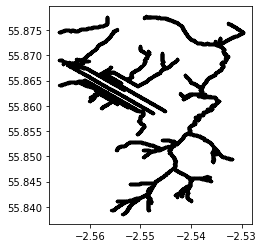

In [14]:
gdf.plot(marker='o', color="k", markersize=5);

Lets add some styling to this plot. I need to `import matplotlib` for this first.

Text(73.78845032375783, 0.5, 'latitude')

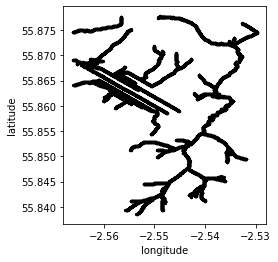

In [17]:
import matplotlib.pyplot as plt
gdf.plot(marker='o', color="k", markersize=5);
plt.xlabel("longitude")
plt.ylabel("latitude")

Those funny channels to the right are in the lake. We are only interested in the channels to the right. 
They actually have a different `basin_key` than the channels to the left. We can plot the basin numbers:

Text(73.78845032375783, 0.5, 'latitude')

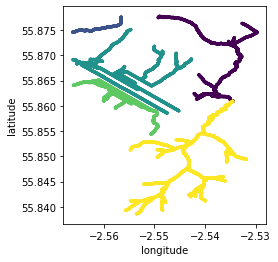

In [18]:
gdf.plot(marker='o', c=gdf.basin_key, markersize=5)
plt.xlabel("longitude")
plt.ylabel("latitude")

If you want to select only one basin, you can make a new dataframe like this:

Text(42.469137312988636, 0.5, 'latitude')

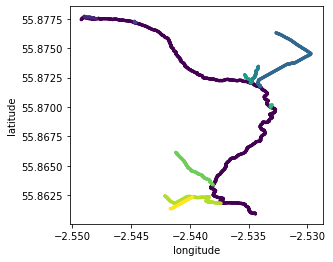

In [29]:
gdf_b0 = gdf[(gdf['basin_key'] == 0)]
gdf_b0.plot(marker='o', c=gdf_b0.source_key, markersize=5)
plt.xlabel("longitude")
plt.ylabel("latitude")

## Plot some profiles

Killmade Burn is basin 4. Basin 0 is also interesting (it is the on on the opposite side of the valley). 
We can plot these valleys by selecting the correct data:

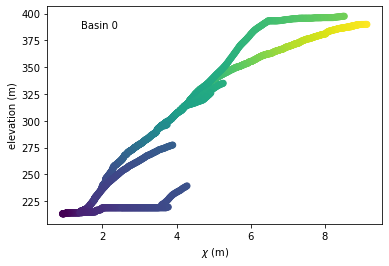

In [39]:
basin_0 = 0
gdf_b0 = gdf[(gdf['basin_key'] == basin_0)]

fig = plt.figure()
ax = fig.add_subplot(1, 1,1)

plt.scatter(gdf_b0.chi,gdf_b0.elevation,c=gdf_b0.flow_distance)
plt.xlabel(r"$\chi$ (m)")
plt.ylabel("elevation (m)")
ax.text(0.1,0.9,"Basin "+str(this_basin_key),transform=ax.transAxes)
fig.show()


We could add a second basin:

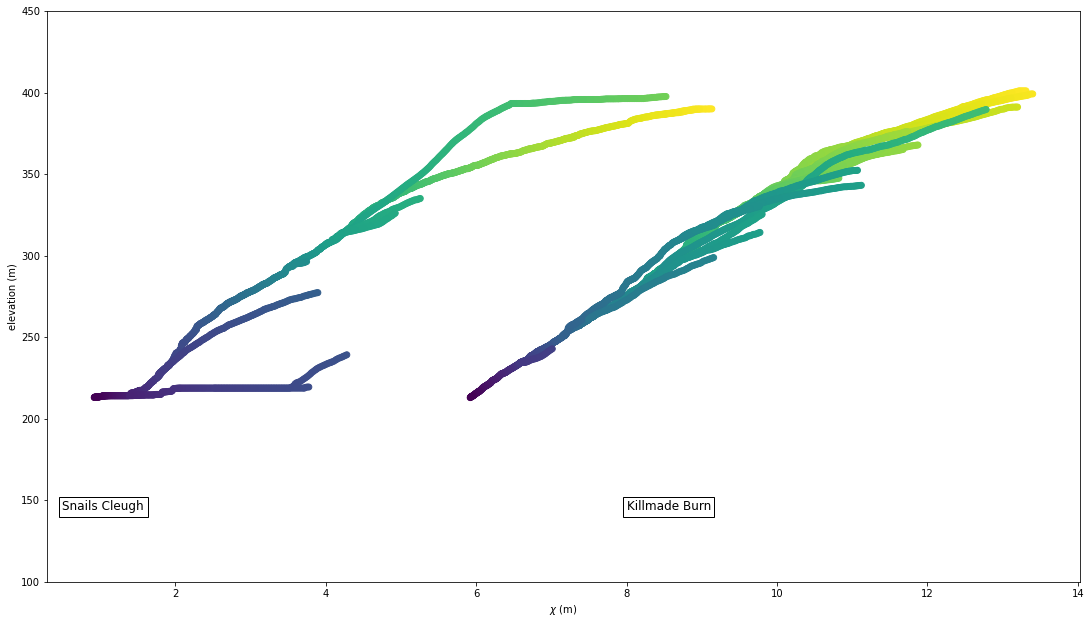

In [49]:
import numpy as np

basin_0 = 0
gdf_b0 = gdf[(gdf['basin_key'] == basin_0)]
basin_4 = 4
gdf_b4 = gdf[(gdf['basin_key'] == basin_4)]

fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot(1, 1,1)

plt.scatter(gdf_b0.chi,gdf_b0.elevation,c=gdf_b0.flow_distance)

# I am adding a chi distance of 8 to the chi coordiante to have the basins stack
plt.scatter(np.add(gdf_b4.chi,5),gdf_b4.elevation,c=gdf_b4.flow_distance)
plt.xlabel(r"$\chi$ (m)")
plt.ylabel("elevation (m)")

plt.text(0.5, 150, "Snails Cleugh", size=12,
         ha="left", va="top",
         bbox=dict(boxstyle="square",
                   ec=(0., 0., 0.),
                   fc=(1., 1.0, 1.0),
                   )
        )

plt.text(8, 150, "Killmade Burn", size=12,
         ha="left", va="top",
         bbox=dict(boxstyle="square",
                   ec=(0., 0., 0.),
                   fc=(1., 1.0, 1.0),
                   )
        )

ax.set_ylim(100,450)
fig.show()


We can also do this with the channel profile. 

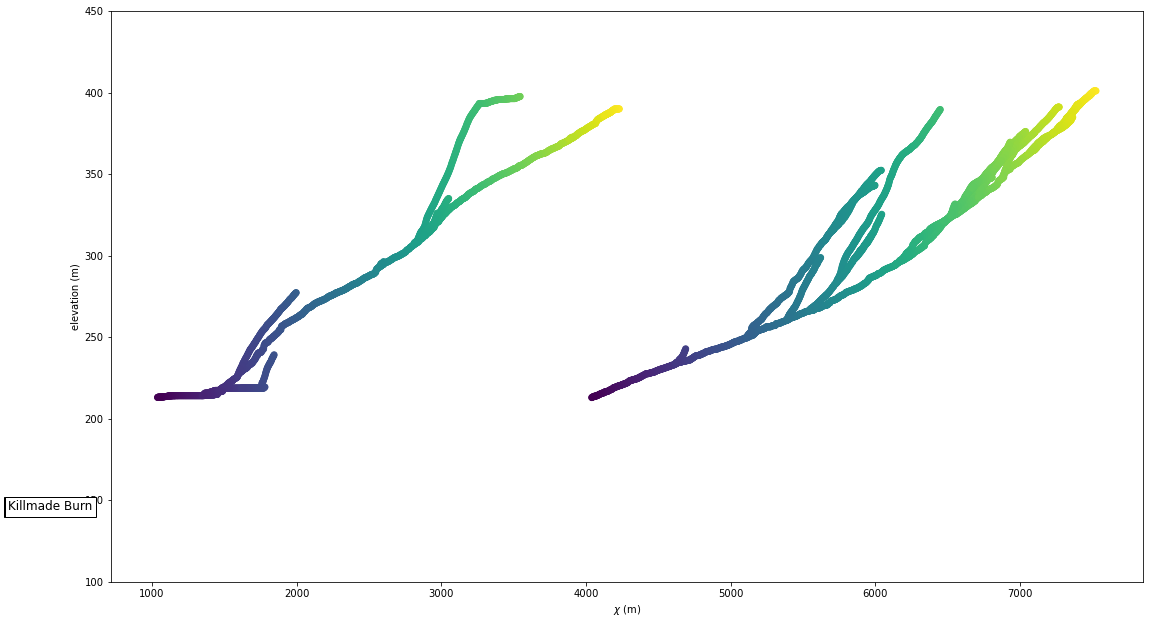

In [51]:
basin_0 = 0
gdf_b0 = gdf[(gdf['basin_key'] == basin_0)]
basin_4 = 4
gdf_b4 = gdf[(gdf['basin_key'] == basin_4)]

fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot(1, 1,1)

plt.scatter(gdf_b0.flow_distance,gdf_b0.elevation,c=gdf_b0.flow_distance)

# I am adding a chi distance of 8 to the chi coordiante to have the basins stack
plt.scatter(np.add(gdf_b4.flow_distance,3000),gdf_b4.elevation,c=gdf_b4.flow_distance)
plt.xlabel(r"$\chi$ (m)")
plt.ylabel("elevation (m)")

plt.text(1000, 150, "Snails Cleugh", size=12,
         ha="left", va="top",
         bbox=dict(boxstyle="square",
                   ec=(0., 0., 0.),
                   fc=(1., 1.0, 1.0),
                   )
        )

plt.text(8, 150, "Killmade Burn", size=12,
         ha="left", va="top",
         bbox=dict(boxstyle="square",
                   ec=(0., 0., 0.),
                   fc=(1., 1.0, 1.0),
                   )
        )

ax.set_ylim(100,450)
fig.show()
